<a href="https://colab.research.google.com/github/galmerom/Data-Science-Tools/blob/master/DataScienceToolsExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inroduction**

This is a demonstration notebook for the Data-Science-Tools repository.

Written by **Gal Merom**

There are 3 modules in the repository:


1.   **Charts** - Gives easy-to-use tools for making charts and other graphical uses.
2.   **Transformers** - Easy to use transformers that returns dataframe (not numpy) + extra.
3.   **mega_classifier** - 5 classification models with grid-search. Start your modeling here.



## In more details:


*   **Charts**:
>1.   **HistCharts** - Build a set of histograms with easy customizations.
>2.   **BarCharts** - Build a set of bar charts. Add values, add %, write a conclusion on the chart.
>3.   **StackBarCharts** - Summarize the important data using a stacked bar chart. Show values, and show text in a chart.
>4.   **pairplotVerCol** - Show a chart for each feature against the target column.
>5.   **pairplotVerColSNS** - The same as pairplotVerCol, it uses the seaborn library to show the charts.
>6.   **InertiaElbow** - Show an elbow chart of inertial ver. K in k-means.
>7.   **PlotCM** - Show a graphical confusion matrix and classification report.




*   **Transformers**:
>1.    **P_StandardScaler** - The same as scikit-learn StandardScaler only returns a Dataframe.
>2.    **P_MaxAbsScaler** - The same as scikit-learn MaxAbsScaler only returns a Dataframe.
>3.    **P_MinMaxScaler** - The same as scikit-learn MinMaxScaler only returns a Dataframe.
>4.    **P_SimpleImputer** - The same as scikit-learn, SimpleImputer only returns a Dataframe.
>5.    **P_SelectKBest** - P_SelectKBest returns a dataframe + can deal with negative number if chosen
>6.    **BinaryDownSizeTransformer** - Downsize a binary dataset according to any proportion desired by the user

*   **MegaClassifier class**:

>Available methods:

>>1.    **fit** - Runs a grid search on all 5 models and finds the best parameters for each model.
2. **predict** - Run the best parameters predict on all models and return y_pred for each model in a dataframe.
3.     **ScoreSummery()** - Return a dataframe that contains each score (from the score function) for each model.
4.     **GetClassificationReport()** - A classification report for all the models. Returned in a dataframe format.
5. **GetSpecificLabelScore** - Return the specific score and the specific model that was given.
6. **ParamInsight** - Gets a model name and return the change in scoring for each hyperparameter that was in the grid search
7. **GetFeatureImportance** - Show the feature importance of each model or all of them together. By default, it also returns the best features in a bar chart.
8. **GetGridHyperParameters**  - Gets a model name and returns a dictionary with the grid search parameters.
9. **SetGridHyperParameters** - Allow the user to change the parameters of a specific model grid search
10. **ShowConfusionMatrix** - Show confusion matrix for each model.

# Imports

In [ ]:
import shutil
import sys

shutil.rmtree('Data-Science-Tools',ignore_errors=True)

!git clone https://github.com/galmerom/Data-Science-Tools.git
SourceCodePath2 = 'Data-Science-Tools'
sys.path.insert(2, SourceCodePath2 )

Cloning into 'Data-Science-Tools'...
remote: Enumerating objects: 217, done.
remote: Counting objects: 100% (217/217), done.
remote: Compressing objects: 100% (149/149), done.
remote: Total 217 (delta 128), reused 155 (delta 66), pack-reused 0
Receiving objects: 100% (217/217), 45.17 KiB | 2.05 MiB/s, done.
Resolving deltas: 100% (128/128), done.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import charts
import transformers as TR
import mega_classifier as MC

In [ ]:
import importlib
importlib.reload(charts)

<module 'charts' from 'Data-Science-Tools/charts.py'>

# Get a database to use for this notebook

In [ ]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target,name='target')
df = X.join(y)

# Using charts for EDA

## Histograms

The HistCharts draw histograms with many customizations. It gets the following parameters:


1.   **List of dataframes** -  Each data frame will be a chart
2.   **List of titles** - Each will be the title in the corresponding chart.
3.   **NumRows** - Number of rows to show the charts
4.   **NumOfCol** - Number of columns to show the charts
5.   **ChartSize** - The size of the figure 
6.   **Fsize** -  Font size of the data labels
7.   **TitleSize** - Font size of the title
8.   **WithPerc** - The type of value label to put:
          0 or default = data labels + Percentage
          1 = Only percentage
          2= Only values 
9.   **binSize** - How many bins to use for the histogram
10.  **SaveCharts** - If True then it will save the chart as jpeg (use it in a slideshow)

In [ ]:
df1 = df['sepal length (cm)']
df2 = df['sepal width (cm)']
df3 = df['petal length (cm)']
df4 = df['petal width (cm)']
df1_desc = 'sepal length histogram'
df2_desc = 'sepal width histogram'
df3_desc = 'petal length histogram'
df4_desc = 'petal width histogram'

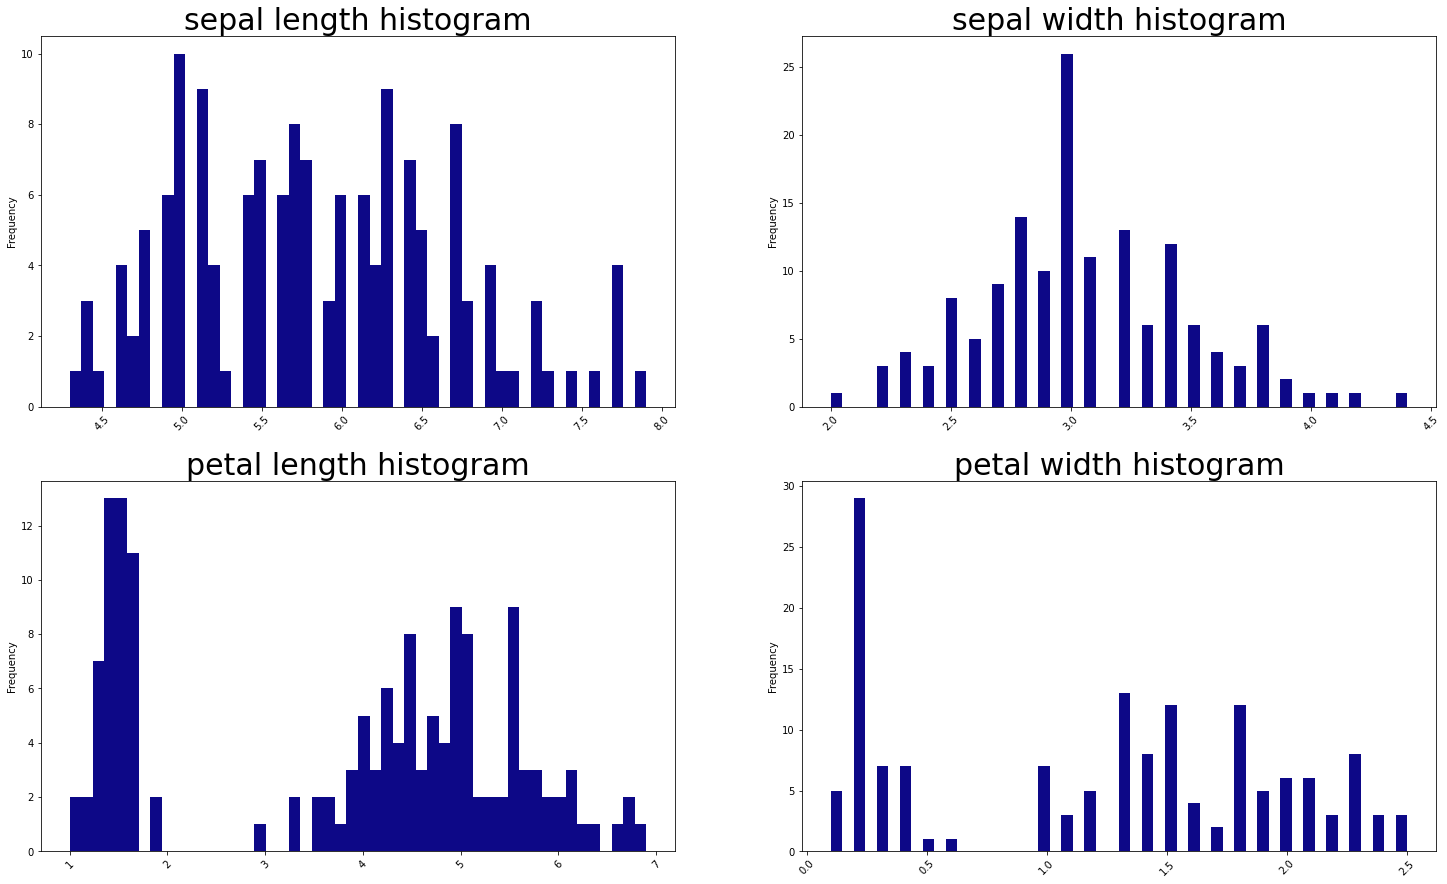

In [ ]:
charts.HistCharts([df1,df2,df3,df4],[df1_desc,df2_desc,df3_desc,df4_desc],2,2)

## Bar charts

The bar charts are the most common, and therefore it has a lot of customizations to improve it (although most parameters have defaults):

1.   **List of dataframes** -  Each data frame will be a chart
2.   **List of titles** - Each will be the title in the corresponding chart.
3.   **NumRows** - Number of rows to show the charts
4.   **NumOfCol** - Number of columns to show the charts
5.   **ChartType** - The default will be 'bar' but it can also show 'barh' as a horizontal bar.
6.   **ChartSize** - The size of the figure 
7.   **Fsize** -  Font size of the data labels
8.   **TitleSize** - Font size of the title
9.   **WithPerc** - The type of value label to put:
          0 or default = data labels + Percentage
          1 = Only percentage
          2= Only values 
10.  **XtickFontSize** - The size of the fonts of the x ticks labels
11.   **Colorcmap** - The color scheme used. Schemas can be found [here](https://matplotlib.org/examples/color/named_colors.html)
12.  **Xlabelstr** - A list with 2 elements. The first element is the **X** axis label. The second element is the font size of the label.
13.  **Ylabelstr** - A list with 2 elements. The first element is the **Y** axis label. The second element is the font size of the label.
14.  **PadValue** - The amount of empty space to put around the value label
15.  **LabelPrecision** - The number of digits after the period in the label value
16.  **txt2show** - Gets a list of tuples. Each tuple is for each chart. Every tuple must have 4 values:
(string to show, font size, position correction of x, position correction of y) 

>for example:

                 txt2show=[('50% of people are men',10,0.1,-0.1)]
                 The position correction values are in percentage of the chart.
                 So if we want to move the textbox 20% (of the chart length) to the right, the third value will be 0.2

17.  **RotAngle** - The angle for the x-axis labels
18.  **SaveCharts** - If True, then it will save the chart as a jpeg (use it in a slideshow)


In [ ]:
df_2 = df.groupby('target').mean()
df1 = df_2['sepal length (cm)']
df2 = df_2['sepal width (cm)']
df3 = df_2['petal length (cm)']
df4 = df_2['petal width (cm)']
df1_desc = 'sepal length mean values'
df2_desc = 'sepal width mean values'
df3_desc = 'petal length mean values'
df4_desc = 'petal width mean values'
txt1 = ('The sepal length of class 0 is the shortest\n, While class 2 is the longest',10,0.02,-0.1)
txt2 = ('Not much of a difference, but the class 0 width seems to be wider',10,0.33,-0.05)
txt3 = ('The Patal length of class 0 is much smaller.',12,0.02,-0.05)
txt4 = ('The petal length of class 0 is very, very small\n in comparison to the other classes.',12,0.02,-0.1)

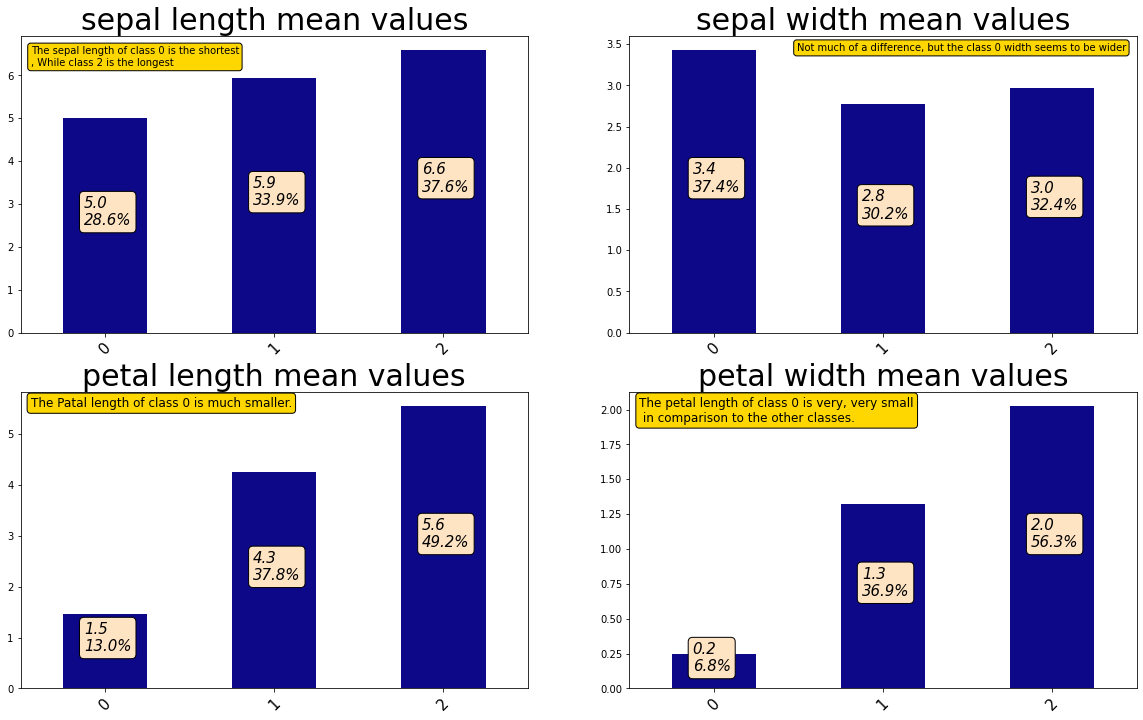

In [ ]:
charts.BarCharts([df1,df2,df3,df4],[df1_desc,df2_desc,df3_desc,df4_desc],2,2,txt2show=[txt1,txt2,txt3,txt4],ChartSize=(20, 12),LabelPrecision=1,)

### Horizontal bar chart

Use the same BarCharts function to show a horizontal bar chart just add

 ChartType='barh'

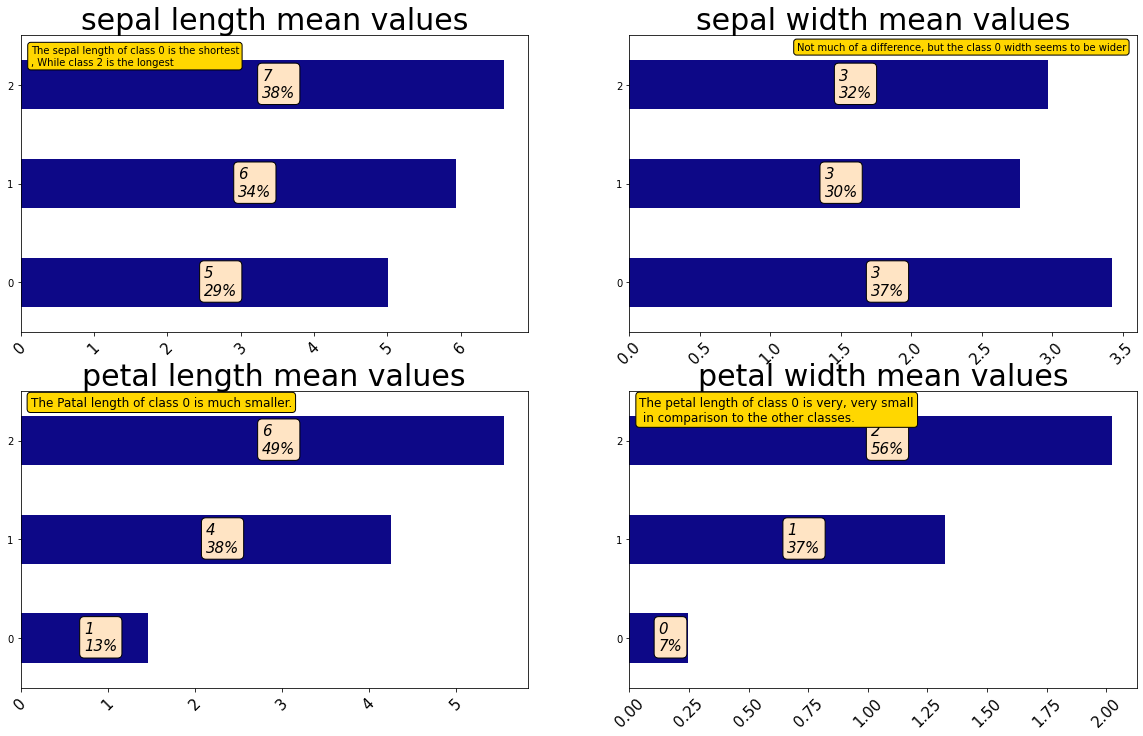

In [ ]:
charts.BarCharts([df1,df2,df3,df4],[df1_desc,df2_desc,df3_desc,df4_desc],2,2,txt2show=[txt1,txt2,txt3,txt4],ChartSize=(20, 12),LabelPrecision=1,ChartType='barh')

## Stack Bar Chart + 100% Stack Bar Chart

**The stacked bar are used to show a summary of data. Usually we will use groupby in pandas. **

It gets almost the same parameters as the bar chart with the following changes:

**New Parameteres:**
1.  **ColorInt** - Determine the color theme. Currently there are 5 color pallets use (0,1,2,3,4) to run them
2.  **StackBarPer**- If **true** -> 100% stack bar.If **false** ordinary stack bar.
3. **TopValFactor** - The max value of the y-axis is determined by the max value in the chart * TopValFactor

**Dropped  parameters:**


1.  **Colorcmap** 
2.  **LabelPrecision** 
3.  **RotAngle**



In [ ]:
def PetalLengthCategory(x):
    if x<=2:
        return 'Small petal length'
    elif x>=4.5:
        return 'Large petal length'
    else:
        return 'Medium Petal length'

df['petal length category'] = df['petal length (cm)'].map(lambda x: PetalLengthCategory(x))
dfPetal = df.groupby(['petal length category','target']).count()['petal length (cm)'].to_frame().reset_index()
dfPetal.rename(columns={'petal length (cm)':'NumOfRecords'},inplace=True)

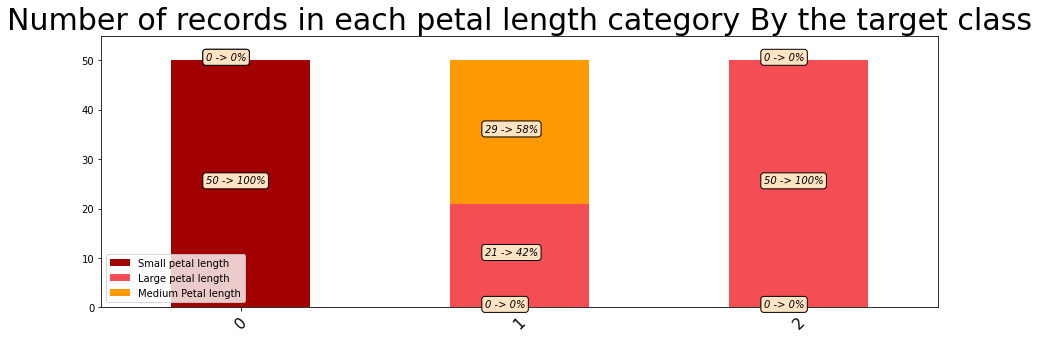

In [ ]:
charts.StackBarCharts([(dfPetal,'target','petal length category','NumOfRecords')],['Number of records in each petal length category By the target class'])

### And with a different color palette

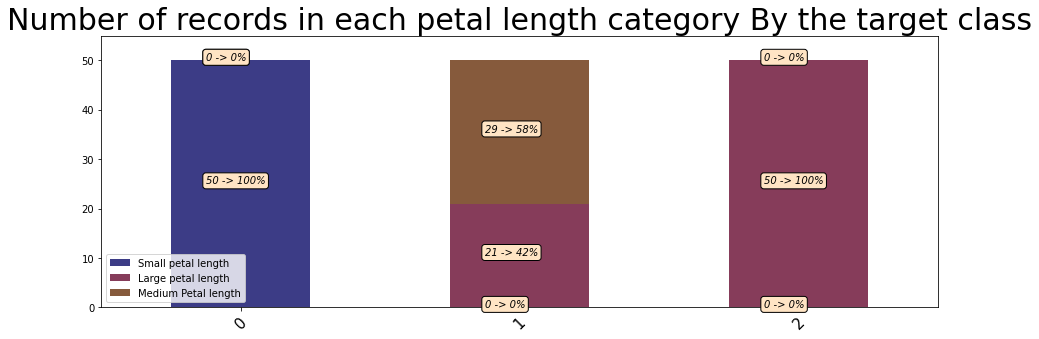

In [ ]:
charts.StackBarCharts([(dfPetal,'target','petal length category','NumOfRecords')],['Number of records in each petal length category By the target class'],ColorInt=1)

## pair plot charts

Pair plot charts are used for finding the correlations between 2 features in regard to the target column or classes.

The following 2 functions takes each feature and draw them in regards to the target features. The charts are drawn according to the feature type:



1.   **Numeric values** are drawn as a scatter chart
2.   **Strings and booleans** are drawn as box plot charts



*   **pairplotVerCol** - Uses **matplotlib** library for drawing the charts
*   **pairplotVerColSNS** - Uses **seaborn** library for drawing the charts








**Parameters:**

1. **DF** - the input dataframe, including the target column.
2. **TargetCol** - the name of the target column.
3. **Figsize** - The size of the figure.
4. **Xlabelstr** - Font size of X-axis labels.
5. **Ylabelstr**  - Font size of Y-axis labels.
6. **RotAngle** - The rotation angle of the x-axis labels.
7. **S** - The size of a point in a scatter plot. See [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html).
8. **C** - *Only in pairplotVerCol*. Set the color of the points see [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html).
9. **UseTargetAsHue** Only in pairplotVerColSNS. If True, then use the target column also as ["hue"](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) which means change the colors according to target value.

#### Adding a category to make the data richer 

In [ ]:
def SepalLengthCategory(x):
    if x<=5:
        return 'Small sepal length'
    elif x>=6.6:
        return 'Large sepal length'
    else:
        return 'Medium sepal length'

df['sepal length category'] = df['sepal length (cm)'].map(lambda x: SepalLengthCategory(x))

### pairplotVerCol charts

Using **matplotlib**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


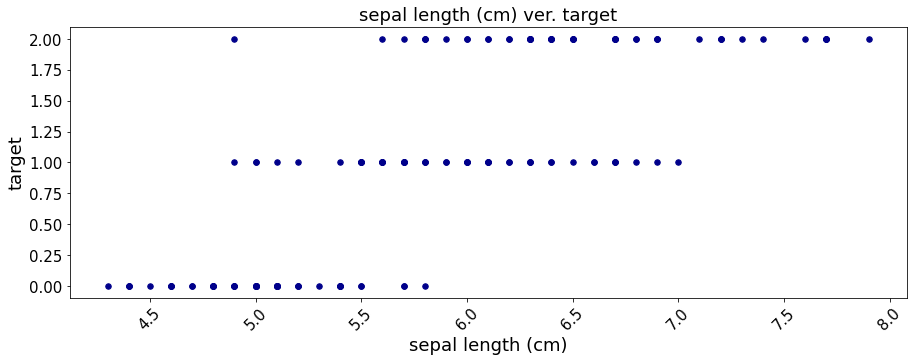

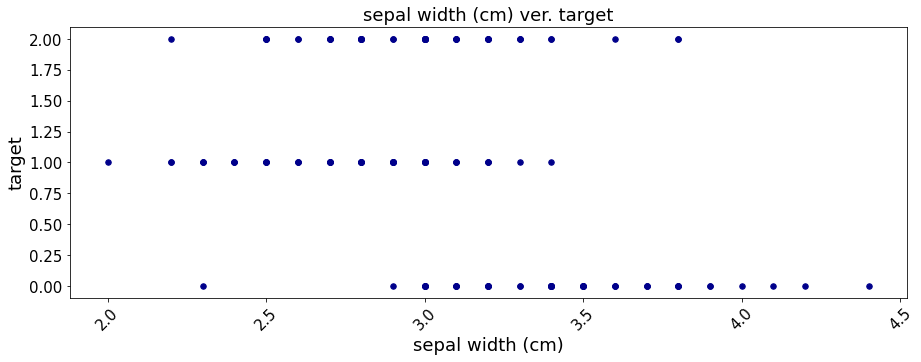

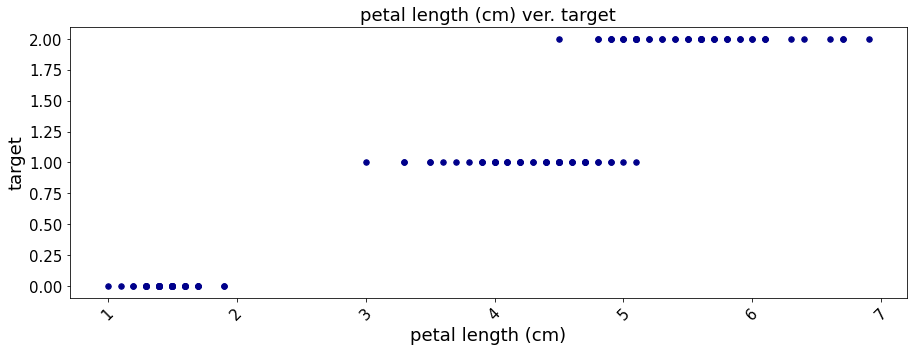

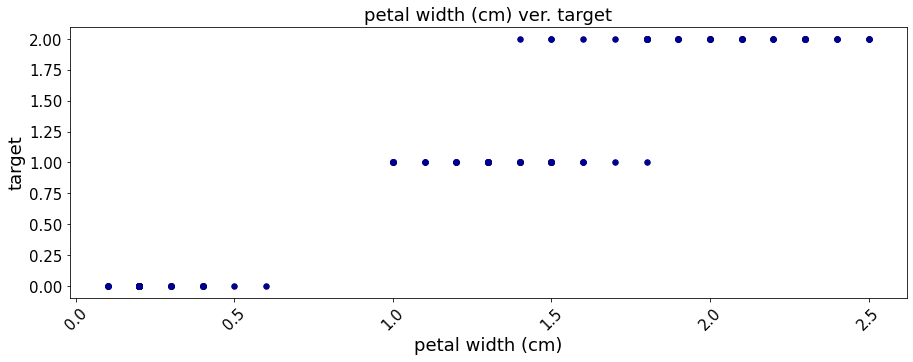

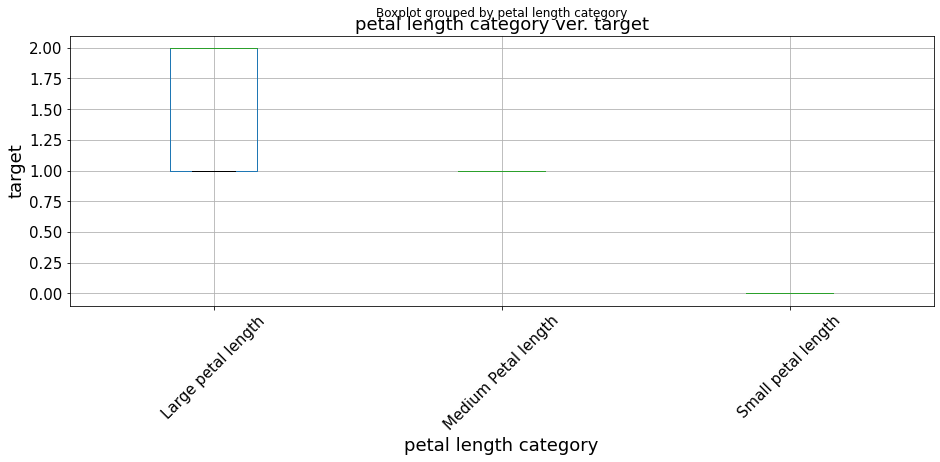

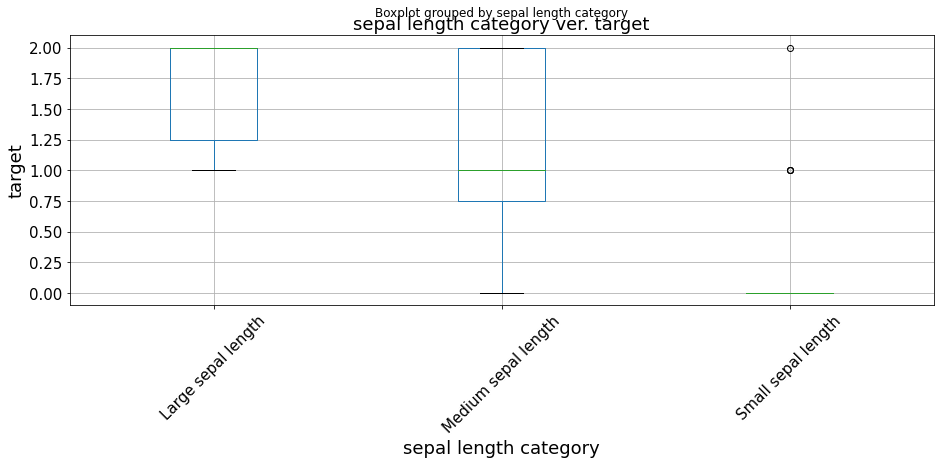

In [ ]:
charts.pairplotVerCol(df,'target')

### pairplotVerColSNS charts

Using **seaborn**

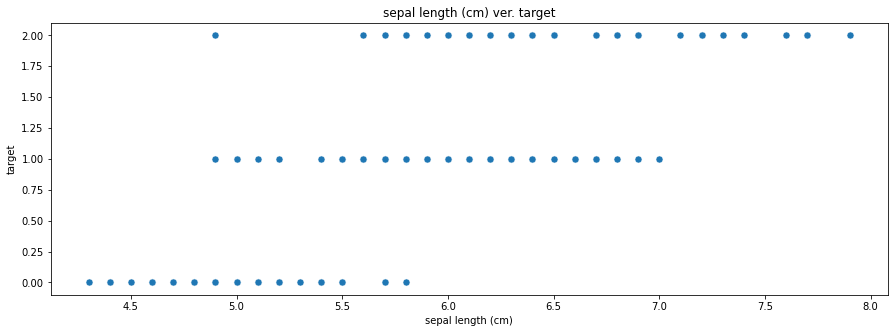

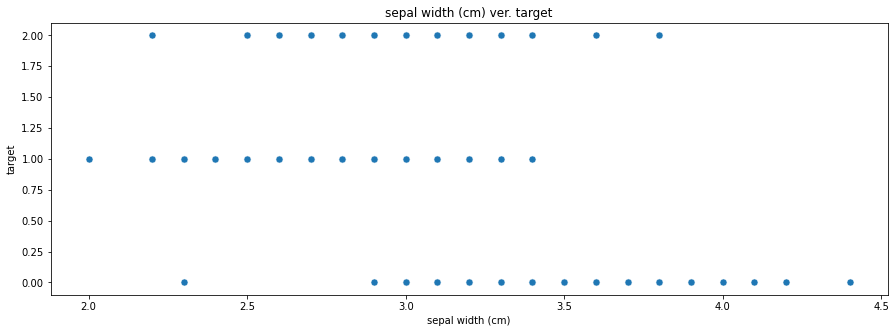

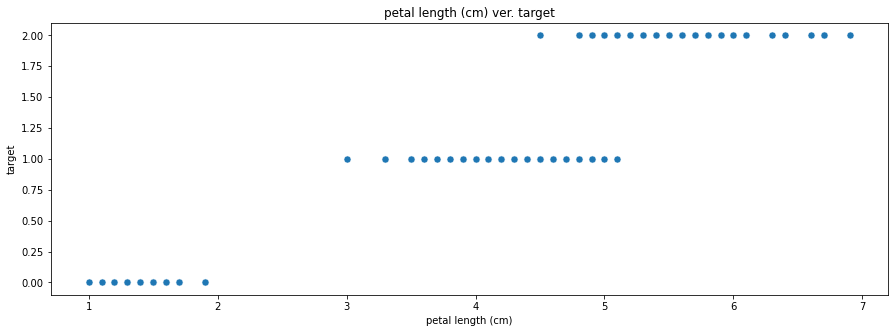

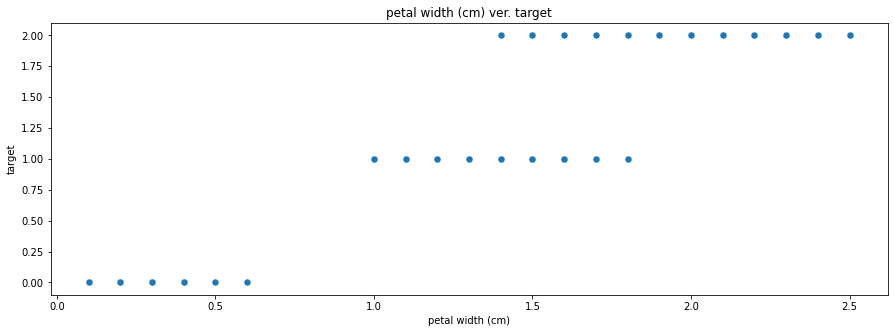

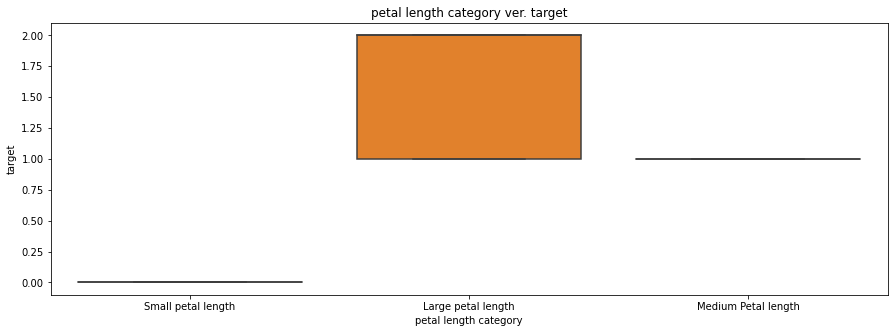

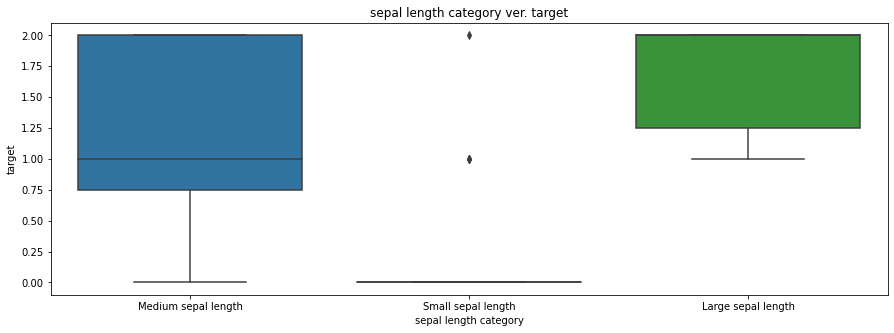

In [ ]:
charts.pairplotVerColSNS(df,'target')

## Find the right k in inertia - kmeans

When using Kmeans we need to apply the K parameter.

To find the right K we look at the "elbow" of a chart that shows the change of k ver. the inertia

**Parameters:**

1. **data** - The input dataframe
2. **model** - The kmean model to run on.
3. **StartFrom** - First k to run from (default=1)
4. **EndAt** - Last k to run (default=10)
5. **AddLabels** - If True then add values to each k (default=False)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df_noString=df.drop(['sepal length category','petal length category'],axis=1)

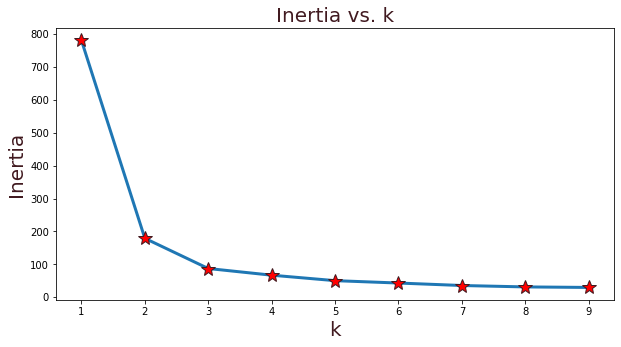

In [ ]:
charts.InertiaElbow(df_noString,KMeans,)

## plotCM - Confusion matrix and classification report

A graphical confusion matrix lets you evaluate the data after running a prediction model.

**Parameters:**
1. **X** - The x dataframe.
2. **y_true** - The y true array.
3. **modelName** - The object that contains the model (to run the predict method).
4. **normalize** - If True, then the matrix's values will be a normalized value of the row (each value is divided by each row's sum).
5. **title** - Title of the chart.
6. **cmap** - the color theme (map) to use for the chart see [documentation](https://matplotlib.org/stable/tutorials/colors/colormaps.html).
7. **precisionVal** - The number of digits after the dot in the value labels.
8. **titleSize** - The font size of the title
9. **fig_size** - The figure size
10. **InFontSize** - The font size of the value labels
11. **LabelSize** - The font size of the classes (the ticks on the axis)
12. **ClassReport** - If True, then show the classification report after the confusion matrix

### Prepare data

In [ ]:
input_df = pd.get_dummies(df)

X_train,X_test,y_train,y_test = train_test_split(input_df,df['target'],test_size=0.2,random_state=1234)
# create an error in the data so we will not get 100% accuracy
y_test.iloc[0] = 2
y_test.iloc[1] = 0
# train and predict
LR_model = LogisticRegression()
LR_model.fit(X_train,y_train)
y_pred = LR_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### confusion matrix

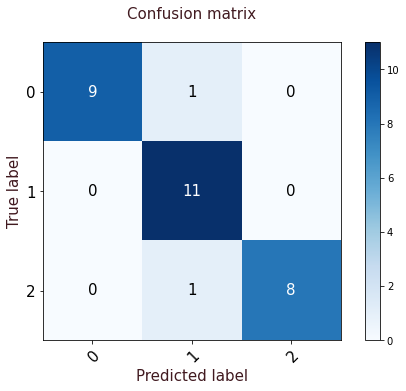



Classification_report
*********************

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.85      1.00      0.92        11
           2       1.00      0.89      0.94         9

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.94        30
weighted avg       0.94      0.93      0.93        30



In [ ]:
charts.plotCM(X_test,y_test,LR_model)

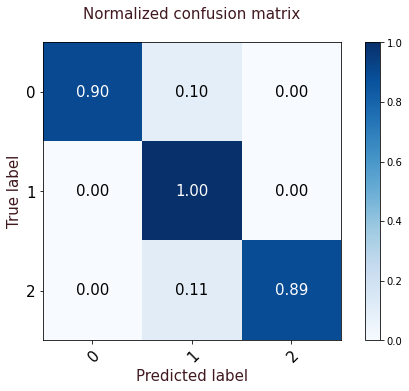



Classification_report
*********************

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.85      1.00      0.92        11
           2       1.00      0.89      0.94         9

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.94        30
weighted avg       0.94      0.93      0.93        30



In [ ]:
charts.plotCM(X_test,y_test,LR_model,normalize=True)

### Confusion matrix that is not using prediction (within the function) 
It gets the y_pred and the classes and gives the same result as the plotCM

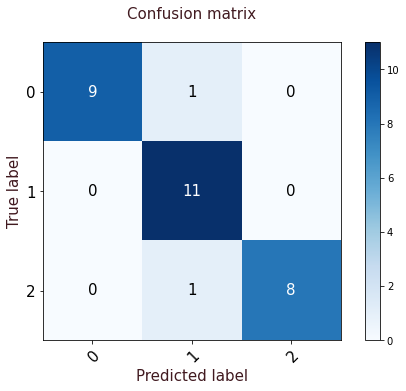



Classification_report
*********************

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.85      1.00      0.92        11
           2       1.00      0.89      0.94         9

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.94        30
weighted avg       0.94      0.93      0.93        30



In [ ]:
InputClasses = LR_model.classes_
charts.ClassicGraphicCM(y_pred,y_test,InputClasses)

# Pandas transformers

The pandas' transformers use scikit-learn transformers, but it returns a Dataframe, not a numpy array. 

## P_StandardScaler

### Default - scale all numeric columns

In [ ]:
ScalerAll = TR.P_StandardScaler()
df_standart = ScalerAll.fit_transform(df.drop('target',axis=1))
df_standart.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),petal length category,sepal length category
0,-0.900681,1.019004,-1.340227,-1.315444,Small petal length,Medium sepal length
1,-1.143017,-0.131979,-1.340227,-1.315444,Small petal length,Small sepal length
2,-1.385353,0.328414,-1.397064,-1.315444,Small petal length,Small sepal length


### Option - Scale specific columns only

In [ ]:
Scaler1Col = TR.P_StandardScaler(columns = ['sepal length (cm)'])
df_standart1Col = Scaler1Col.fit_transform(df.drop('target',axis=1))
df_standart1Col.head(3)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),petal length category,sepal length category
0,-0.900681,3.5,1.4,0.2,Small petal length,Medium sepal length
1,-1.143017,3.0,1.4,0.2,Small petal length,Small sepal length
2,-1.385353,3.2,1.3,0.2,Small petal length,Small sepal length


## P_MaxAbsScaler

Default: Scale all numeric columns. Option - Scale only a list of columns

In [ ]:
Scaler = TR.P_MaxAbsScaler()
df_MaxAbs = Scaler.fit_transform(df.drop('target',axis=1))
df_MaxAbs.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),petal length category,sepal length category
0,0.645570,0.795455,0.202899,0.08,Small petal length,Medium sepal length
1,0.620253,0.681818,0.202899,0.08,Small petal length,Small sepal length
2,0.594937,0.727273,0.188406,0.08,Small petal length,Small sepal length


## P_MinMaxScaler

In [ ]:
Scaler = TR.P_MinMaxScaler()
df_MinMax = Scaler.fit_transform(df.drop('target',axis=1))
df_MinMax.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),petal length category,sepal length category
0,0.222222,0.625000,0.067797,0.041667,Small petal length,Medium sepal length
1,0.166667,0.416667,0.067797,0.041667,Small petal length,Small sepal length
2,0.111111,0.500000,0.050847,0.041667,Small petal length,Small sepal length


## P_SimpleImputer

In [ ]:
df_MinMax.iloc[0,0] = np.nan
df_MinMax.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),petal length category,sepal length category
0,NaN,0.625,0.067797,0.041667,Small petal length,Medium sepal length


In [ ]:
Imput = TR.P_SimpleImputer()
df_imput = Imput.fit_transform(df_MinMax)
df_imput.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),petal length category,sepal length category
0,0.430089,0.625000,0.067797,0.041667,Small petal length,Medium sepal length
1,0.166667,0.416667,0.067797,0.041667,Small petal length,Small sepal length
2,0.111111,0.500000,0.050847,0.041667,Small petal length,Small sepal length


## P_SelectKBest

Almost like SelectKBest. the score_func and the k parameters are the same.

The SelectKBest is not working with negative numbers. So we can use a transformer before to adjust the values to be non-negative ot we can use a new parameter called DealWithNegValues. 

DealWithNegValues can get the following values:

                                                    0 - Don't do anything
                                                    1 - Use MinMaxScaler
                                                    2 - Add minimum value for each column

In [ ]:
    KBestModel=TR.P_SelectKBest(DealWithNegValues=1,score_func=chi2,k=4)
    train_X_new = KBestModel.fit_transform(X_train,y_train)
    Test_X_new = KBestModel.transform(Test_X)

## DownSizeTransformer

Downsize a binary dataset according to any proportion desired by the user.

The idea is to get a dataset with the proportion you need for the important class.

Parameters:

1. PropDesiredOfPos - gets the desired proportion (float) for the important class. (a number between 0 and 1)
2.  positiveLabel - The important class.
3. TargetCol - The name of the target feature
4. Direction - How to downsize, possible values:
    0.  = Trim the not important classes records from the beginning towards the end (good for time series)
    1. = Trim the not important classes records from the end of the dataframe toward the beginning (trim the last records).
    2. use random trimming.



### Prepare data

In [ ]:
PreDownSize = df[df['target']<2]

### Before downsize

In [ ]:
PreDownSize.groupby('target').count()['petal width (cm)']

target
0    50
1    50
Name: petal width (cm), dtype: int64

### Downsize

In [ ]:
DSTrans = TR.BinaryDownSizeTransformer(0.6,0,'target',Direction=0,)
DownSizedDF = DSTrans.fit_transform(PreDownSize)

### After downsize

In [ ]:
DownSizedDF.groupby('target').count()['petal width (cm)']

target
0    50
1    33
Name: petal width (cm), dtype: int64

# Mega classifier

The mega classifier is designed for **first encounter with a data set** (after EDA and scaling).

**The problem:**

The search for the right model to use and the right parameters takes a lot of time.

**The solution:**

The mega classifier runs 5 different classification models with many hyperparameters running in grid search and validated in cross-validation.

**Analyse:**

After fitting and predicting, the user gets a set of tools to analyze the data. The idea is to find the **right model and the relevant hyperparameters**. Another scenario is to use the **combination of all models**. 

## **How to use:**

### **Initializing the model:**

**scoring** - gets a scoring function.

**ShortCrossValidParts** - Number of cross validation parts in FAST time running models (DecisionTree', 'LogisticRegression', 'SVC')

**LongCrossValidParts** - Number of cross validation parts in SLOW time running models ('RandomForest', 'XGBOOST')

**Class_weight** - class weights for every model except XGBOOST (that does not support weights)

**MultiClass** - If True, then the data contains multiclass. Some of the models work differently if they get binary classes or multi classes)

**BigDataSet** - Get True if the input datasets contain a lot of records. In that case, the grid search uses fewer hyperparameters.
 
**PathForOutFile** - To avoid losing the data during the fitting in early termination, it saves each model's results on the disk. If empty, then it will not save.

**verbose** - The amount of data to show during the fitting stage. Can get: 0,1,2,3

**RandomSeed** - The random seed



### **Fitting the model**

**Obviously, there are the X and y parameters.**

**New Parameters:**

**RelevantModels** - A list of models to fit. The default is 'all,' and then all models will get fitted.

>Available models: ['DecisionTree','LogisticRegression','RandomForest','SVC','XGBOOST']

**SaveEachRes** = If True, then every time a model gets fit.
              It will save the grid search parameter: cv_results_ to a file. (needs a path in the initializing stage)

After fitting the best parameters can be found in the BestParam variable.

 Use:

 Mega_classifier name.BestParam[name of the desired model]

### **Predicting**

There are 2 prediction methods:

#### **Predict:**

Return a dataframe with the following:


*   **y_true**
*   **y_pred** for each model (using best parameters from the fitting stage)
*   **PredAllModelsByProba** - sums the probability squared for each class. Return the class with the highest score. 

#### **predict_proba:**

Return the same as predict with a new column:


*   **y_average**  average of all y_pred


### **Analyzing the results**

There are 7 tools (methods) to analyze the data in different levels of details:

1. **ScoreSummery**: *Top-level results*. Return a dataframe with the best score for every model + PredAllModelsByProba column that sums the probability squared for each class. Return the class with the highest score.

2. **GetResults**: *Detailed results.* Return a dictionary of all the models' results (the default is all models) or a specific model.

>Each dictionary contains the following:

>*    **Classifier**: name of the classifier,
*   **Score**: The scoring after fitting and predict,
*   **y_pred**: An array with the predicted classes,
*   ***Best_param**: Best parameters for the model (decided during the fit phase)
*   **cv_results**: Read the cv_results in the grid search documentation.
     It Gets the result of every run in the grid search and the cross validation}

   
3. **ParamInsight**: *Explore the hyperparameters* of a specific model. It takes every hyperparameter and shows the score it gets when we group it by the parameter and value. That allows us to understand the effect this hyperparameter has on the scoring.

>It returns a grid of charts for each parameter that shows the mean score (after cross-validation) and
the standard deviation of the cross-validation

4. **GetClassificationReport**: *Detailed score results*. Return a multi-model classification report in the form of a dataframe
5. **GetSpecificLabelScore**: *Very specific Score results*. Slice the classification dataframe (get it by GetClassificationReport methods) by specific labels only and specific score types only.
6. **GetFeatureImportance**: return a dataframe with the feature importance for every model that supports this attribute. As a default, it also shows a chart with the combined results (normalized)
7. **ShowConfusionMatrix** - Show a confusion matrix for each model






### Example:

#### Initializing the model

In [ ]:
Mega_classifier = MC.MegaClassifier(MultiClass=True,verbose=0,)
input_df = pd.get_dummies(df_standart)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(input_df,df['target'],test_size=0.2)

#### Fitting and predicting

In [ ]:
Mega_classifier.fit(X_train,y_train)

Start fitting DecisionTree model.
Current time: 10:26:12
DecisionTree model done fitting.
 Time for fitting:  h: 0  m: 0  s: 3.653745
Start fitting LogisticRegression model.
Current time: 10:26:15
LogisticRegression model done fitting.
 Time for fitting:  h: 0  m: 0  s: 0.328946
Start fitting RandomForest model.
Current time: 10:26:16
RandomForest model done fitting.
 Time for fitting:  h: 0  m: 15  s: 46.97354299999995
Start fitting SVC model.
Current time: 10:42:3
SVC model done fitting.
 Time for fitting:  h: 0  m: 0  s: 1.055706
Start fitting XGBOOST model.
Current time: 10:42:4
XGBOOST model done fitting.
 Time for fitting:  h: 0  m: 2  s: 25.171053999999998


In [ ]:
Mega_classifier.BestParam['RandomForest']

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'max_samples': 0.5,
 'min_samples_leaf': 10,
 'n_estimators': 100,
 'oob_score': True,
 'random_state': 1234}

In [ ]:
y_pred = Mega_classifier.predict(X_test,y_test)
y_pred.head(5)

,y_true,DecisionTree,LogisticRegression,RandomForest,SVC,XGBOOST,PredAllModelsByProba
57,1,1,1,1,1,1,1
8,0,0,0,0,0,0,0
67,1,1,1,1,1,1,1
49,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0


#### Exploring the results

##### Exploring the score element

In this example, we can see the different models accuracy

In [ ]:
Mega_classifier.ScoreSummery()

,DecisionTree,LogisticRegression,RandomForest,SVC,XGBOOST,PredAllModelsByProba
accuracy_score,,,,,,
0,0.966667,1.0,0.966667,0.966667,0.966667,0.966667


The classification report for all models. At the top we can see the classes (0,1,2)

In [ ]:
Mega_classifier.GetClassificationReport()

,Classifier,Score_type,0,1,2,accuracy,macro avg,weighted avg
0,DecisionTree,precision,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
1,DecisionTree,recall,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
2,DecisionTree,f1-score,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
3,DecisionTree,support,9.0,9.000000,12.000000,1.000000,30.000000,30.000000
0,LogisticRegression,precision,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
1,LogisticRegression,recall,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
2,LogisticRegression,f1-score,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
3,LogisticRegression,support,9.0,9.000000,12.000000,1.000000,30.000000,30.000000
0,RandomForest,precision,1.0,0.888889,1.000000,0.966667,0.962963,0.970370
1,RandomForest,recall,1.0,1.000000,0.923077,0.966667,0.974359,0.966667


In case we need a specific data from the report we can define with 2 lists the exact data we want

In [ ]:
Mega_classifier.GetSpecificLabelScore(['precision'],['0','1'])

,Classifier,Score_type,0,1
0,DecisionTree,precision,1.0,1.000000
0,LogisticRegression,precision,1.0,1.000000
0,RandomForest,precision,1.0,0.888889
0,SVC,precision,1.0,1.000000
0,XGBOOST,precision,1.0,1.000000
0,All,precision,1.0,1.000000


##### Exploring the hyperparameters

Explore the XGBOOST hyperparameters effect on the scoring. Each parameter has 2 charts: **mean** and **SD**.

In the example below, we can see that **alpha_score** does not affect the score. But the **gamma_score** may be better while the value is under 1
We can also see that the **min_child_weight** get a better result at 10 than at 5

param_alpha
param_gamma
param_lambda
param_learning_rate
param_max_depth
param_min_child_weight
param_n_estimators


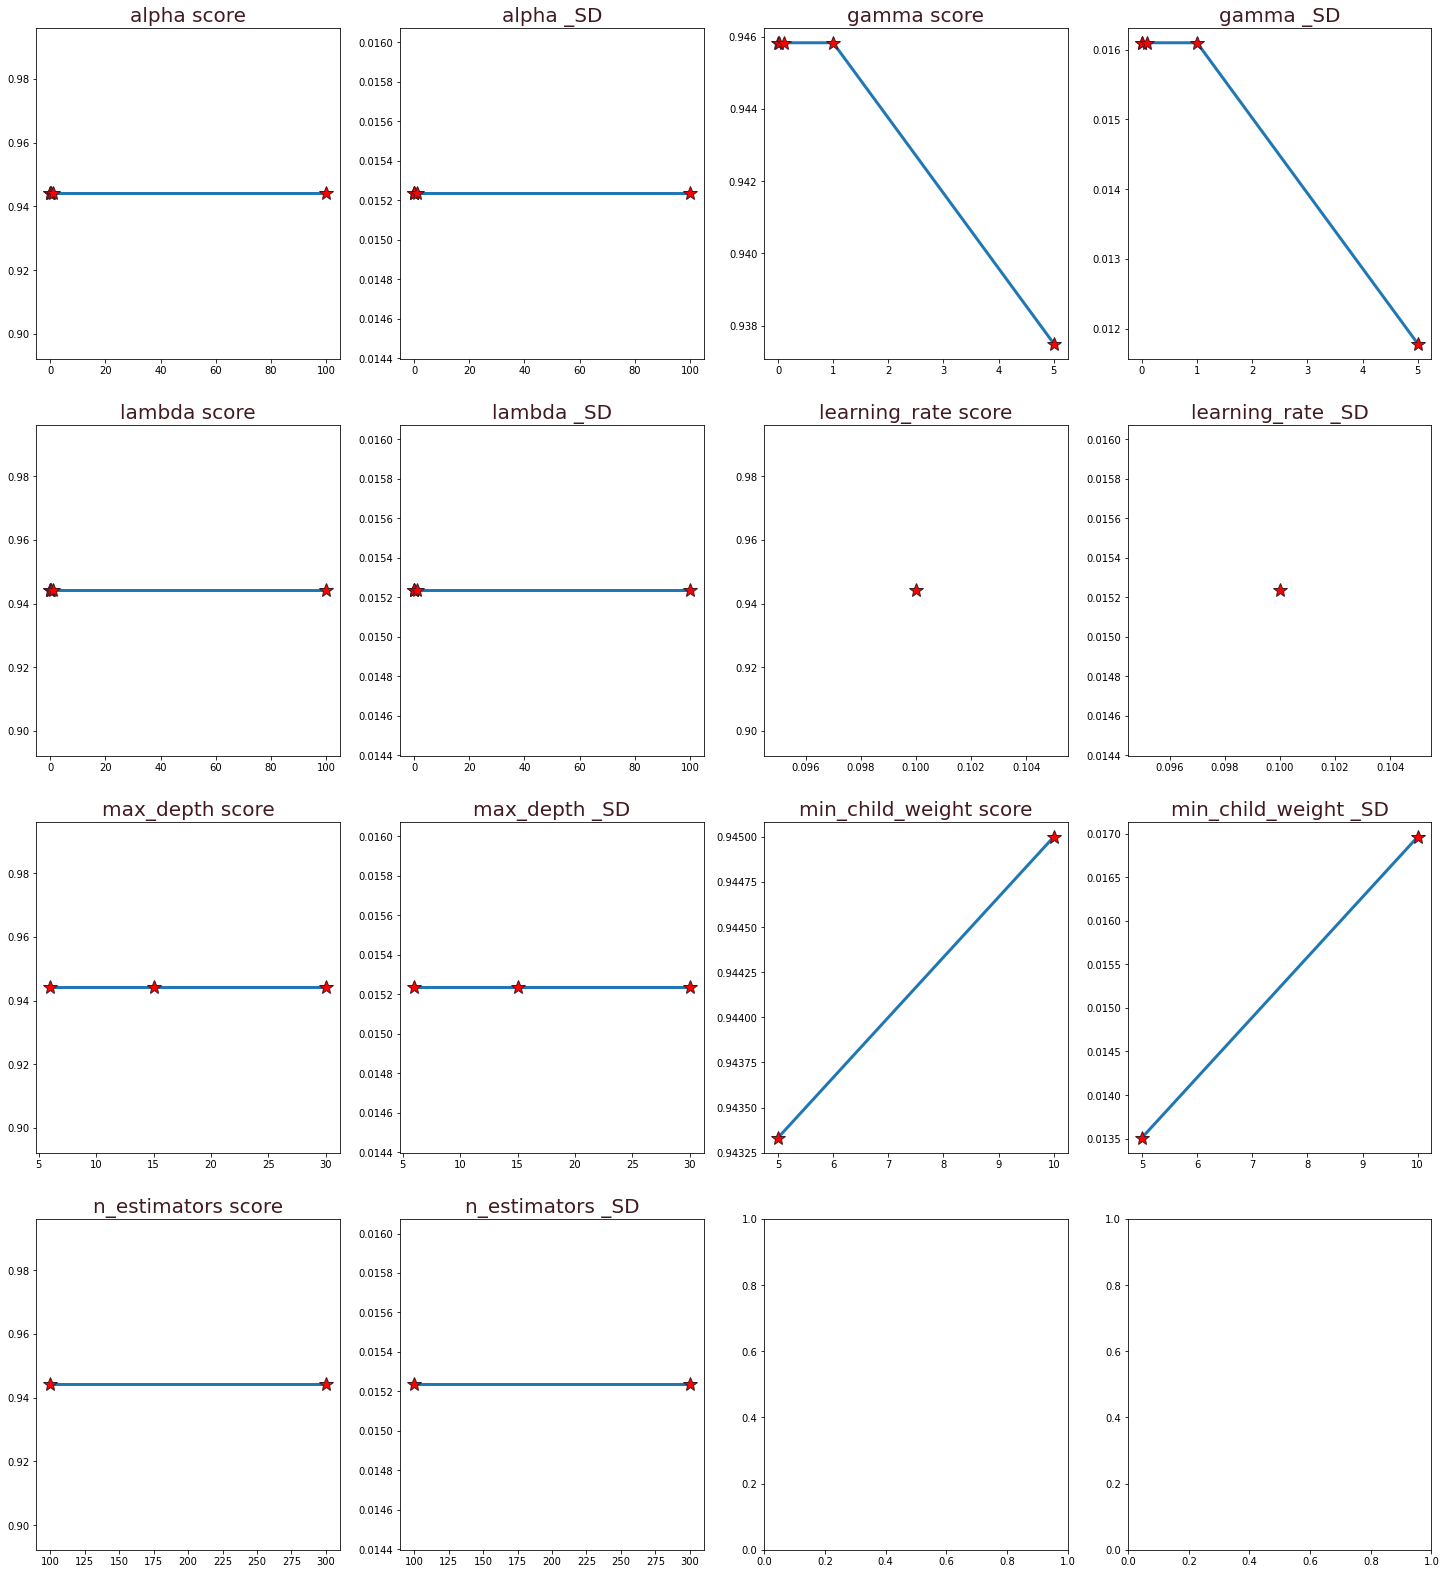

In [ ]:
Mega_classifier.ParamInsight('XGBOOST')

##### Exploring features

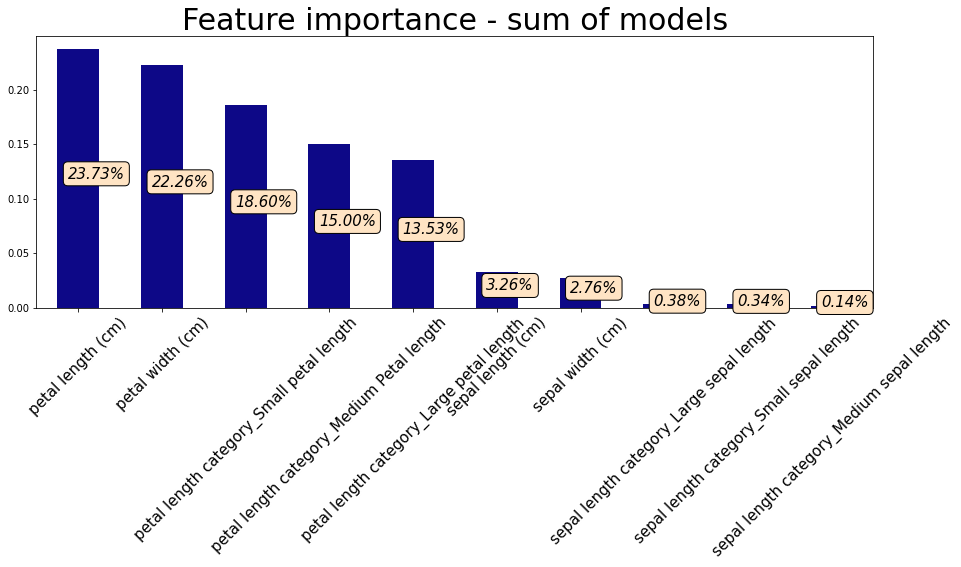

,DecisionTree,RandomForest,XGBOOST,SumOfCol,SumOfColNormalize
petal length (cm),0.171527,0.301265,0.239201,0.711993,0.237331
petal width (cm),0.063668,0.256365,0.347796,0.667829,0.222610
petal length category_Small petal length,0.385714,0.172172,0.000000,0.557886,0.185962
petal length category_Medium Petal length,0.000000,0.049925,0.400090,0.450015,0.150005
petal length category_Large petal length,0.343099,0.062893,0.000000,0.405993,0.135331
sepal length (cm),0.000000,0.088603,0.009146,0.097749,0.032583
sepal width (cm),0.035992,0.043032,0.003766,0.082790,0.027597
sepal length category_Large sepal length,0.000000,0.011354,0.000000,0.011354,0.003785
sepal length category_Small sepal length,0.000000,0.010296,0.000000,0.010296,0.003432
sepal length category_Medium sepal length,0.000000,0.004096,0.000000,0.004096,0.001365


In [ ]:
Mega_classifier.GetFeatureImportance()

#### Others

In [ ]:
Mega_classifier.GetGridHyperParameters('XGBOOST')

{'alpha': [1e-05, 0.01, 0.1, 1, 100],
 'gamma': [0.001, 0.01, 0.1, 1, 5],
 'lambda': [1e-05, 0.01, 0.1, 1, 100],
 'learning_rate': [0.1],
 'max_depth': [6, 15, 30],
 'min_child_weight': [5, 10],
 'n_estimators': [100, 300],
 'seed': [1234]}

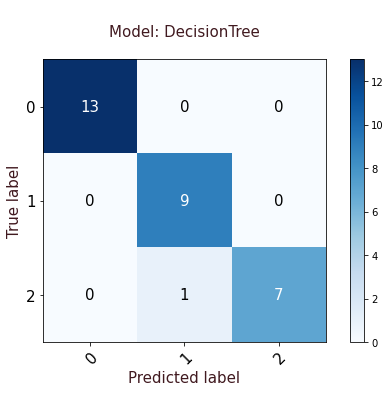

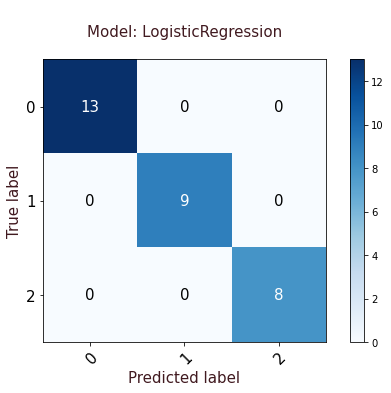

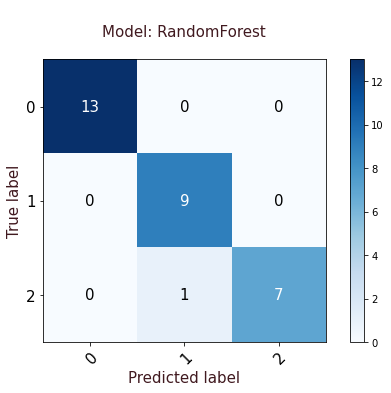

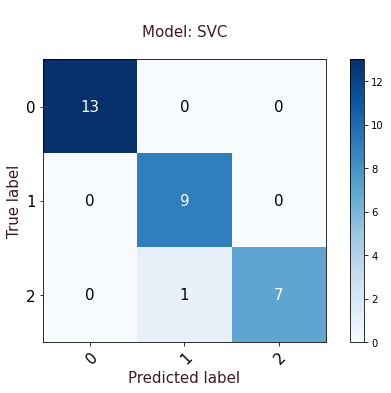

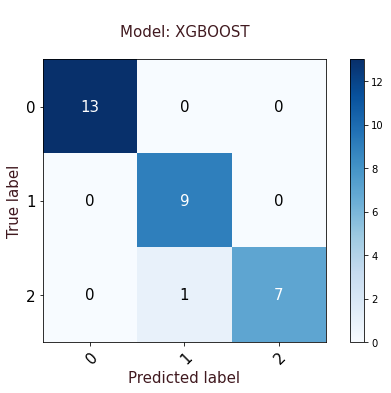

In [ ]:
Mega_claasifier.ShowConfusionMatrix()